<a href="https://colab.research.google.com/github/MarcoBrac/Test/blob/master/test3_hit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
from google.colab import files

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [0]:
#drive.mount('/content/drive')

In [0]:
#!head TABLA_MODELO_HIT_3.csv

In [2]:
 uploaded = files.upload()

Saving TABLA_MODELO_HIT_3.csv to TABLA_MODELO_HIT_3.csv


In [0]:
df1 = pd.read_csv('TABLA_MODELO_HIT_3.csv' ) 

In [0]:
#df1.head()

,CONTRATO,NUM_CLIENTE,BC_SCORE,COSECHA,EDAD,OCPUACION_SEXO,CUENTA_MAS_ANTIGUA_BANCO,MAX_MOP_6M_AB_TDC,CUENTA_MAS_ANTIGUA_TDC,SALDO_VENCIDO_ABIERTAS,MAX_MOP_6M,PORC_UTILIZ_ENTRE_CUENT_REV_AB,PRODUCTO,SUB_PRODUCTO,VINTAGE,AMOUNT,FLAG_1PV_3,FLAG_2PV_6,FLAG_3PV_12,FLAG_3PV_18,FLAG_DESEMBOLSADO
0,400015808,1953462,660,201505,37.0,C_CON NEGOCIO/F,31.0,NaN,NaN,0.0,9.0,NaN,OMEGA,OMEGA_M,201505,11728.0,0,1,1,1,1
1,400015823,772865,663,201505,64.0,F_JUBILADO/F,94.0,2.0,187.0,511.0,2.0,0.219478,OMEGA,OMEGA_M,201505,17191.0,0,0,0,0,1
2,400015912,3873005,561,201505,41.0,A_CON NEGOCIO/M,28.0,NaN,NaN,4662.0,7.0,NaN,OMEGA,OMEGA_M,201505,5897.0,0,0,0,0,1
3,400015973,776366,724,201505,44.0,C_CON NEGOCIO/F,NaN,1.0,18.0,0.0,1.0,0.104229,OMEGA,OMEGA_M,201505,8000.0,0,0,0,0,1
4,400014820,347497,713,201505,40.0,C_CON NEGOCIO/F,49.0,1.0,42.0,0.0,1.0,0.034422,OMEGA,OMEGA_M,201505,29686.0,0,0,0,0,1


In [0]:
df2 = df1.copy()
df2 = df2[df2.COSECHA >= 201600]
df2 = df2[df2['EDAD'].isnull() == False]
df2['TARGET'] = df2.FLAG_3PV_18

In [0]:
#df2.head()

In [0]:
#df2.columns

Index(['CONTRATO', 'NUM_CLIENTE', 'BC_SCORE', 'COSECHA', 'EDAD',
       'OCPUACION_SEXO', 'CUENTA_MAS_ANTIGUA_BANCO', 'MAX_MOP_6M_AB_TDC',
       'CUENTA_MAS_ANTIGUA_TDC', 'SALDO_VENCIDO_ABIERTAS', 'MAX_MOP_6M',
       'PORC_UTILIZ_ENTRE_CUENT_REV_AB', 'PRODUCTO', 'SUB_PRODUCTO', 'VINTAGE',
       'AMOUNT', 'FLAG_1PV_3', 'FLAG_2PV_6', 'FLAG_3PV_12', 'FLAG_3PV_18',
       'FLAG_DESEMBOLSADO', 'TARGET'],
      dtype='object')

In [0]:
vars_num = ['CUENTA_MAS_ANTIGUA_BANCO', 'MAX_MOP_6M_AB_TDC', 'CUENTA_MAS_ANTIGUA_TDC' , 'SALDO_VENCIDO_ABIERTAS', 'MAX_MOP_6M', 'PORC_UTILIZ_ENTRE_CUENT_REV_AB' , 'EDAD']
vars_fac = ['OCPUACION_SEXO']

In [0]:
for v in vars_fac:
    aux = df2[[v,'TARGET']].copy()
    aux['n'] = 1
    aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
    aux.columns=aux.columns.droplevel()
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/=aux[i].sum()
    aux['woe'] =np.log(aux[0]/aux[1])
    df2 = df2.merge(aux[['woe',v]],how='inner',on=v)
    df2.rename(columns={'woe':'W_%s'%v},inplace=True)

In [0]:
#aux.head(10)

TARGET,OCPUACION_SEXO,0,1,woe
0,A_CON NEGOCIO/M,0.190003,0.290477,-0.424487
1,B_EMPLEADO O ASALARIADO/M,0.093966,0.100657,-0.068786
2,C_CON NEGOCIO/F,0.475007,0.465648,0.019900
3,D_EMPLEADO O ASALARIADO/F,0.128659,0.097626,0.276027
4,E_JUBILADO/M,0.039664,0.018565,0.759162
5,F_JUBILADO/F,0.072701,0.027027,0.989517


In [173]:
for i,v in enumerate(vars_num):
    bestk = 0
    best_iv = 0
    iv = 0
    for k in range(2,8):
  
        aux = df2[[v,'TARGET']].copy()
        aux[v] = pd.qcut(aux[v],k, duplicates = 'drop').astype(str)
        aux['n'] = 1
        aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
        aux.columns=aux.columns.droplevel()
        aux.reset_index(inplace=True)
        for i in range(2):
            aux[i]/=aux[i].sum()
        aux['woe'] =np.log(aux[0]/aux[1])
        aux['iv'] = aux['woe']*(aux[0]-aux[1])

        iv = aux['iv'].sum()

        print('%d %.6f'%(k,iv))

        if (aux['iv'].sum()> best_iv) & (~np.isinf(aux['iv'].sum())):
            best_iv = aux['iv'].sum()
            bestk = k


    aux = df2[[v,'TARGET']].copy()
    print("best %s %.4f %d"%(v,best_iv,bestk))
    aux[v] = pd.qcut(aux[v],bestk, duplicates = 'drop').astype(str)
    aux['n'] = 1
    aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
    aux.columns=aux.columns.droplevel()
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/=aux[i].sum()
    aux['woe'] =np.log(aux[0]/aux[1])
    df2[v] = pd.qcut(df2[v],bestk,  duplicates = 'drop').astype(str)
    df2 = df2.merge(aux[['woe',v]],how='inner',on=v)
    df2.rename(columns={'woe':'W_%s'%v},inplace=True)


2 0.100322
3 0.101022
4 0.110924
5 0.110595
6 0.120300
7 0.118776
best CUENTA_MAS_ANTIGUA_BANCO 0.1203 6
2 0.115213
3 0.115213
4 0.115213
5 0.118117
6 0.118117
7 0.118117
best MAX_MOP_6M_AB_TDC 0.1181 5
2 0.118762
3 0.130073
4 0.135550
5 0.147961
6 0.147371
7 0.147542
best CUENTA_MAS_ANTIGUA_TDC 0.1480 5
2 0.000763
3 0.000763
4 0.000763
5 0.056946
6 0.053600
7 0.047024
best SALDO_VENCIDO_ABIERTAS 0.0569 5
2 0.044704
3 0.060158
4 0.060158
5 0.056860
6 0.060460
7 0.060505
best MAX_MOP_6M 0.0605 7
2 0.094475
3 0.092117
4 0.103322
5 0.120807
6 0.099658
7 0.106046
best PORC_UTILIZ_ENTRE_CUENT_REV_AB 0.1208 5
2 0.111008
3 0.134572
4 0.139091
5 0.145557
6 0.148257
7 0.150526
best EDAD 0.1505 7


In [0]:
#df2.head(10)

In [174]:
df2.CUENTA_MAS_ANTIGUA_BANCO.value_counts(normalize=True)

(-0.001, 36.0]    0.155398
(104.0, 131.0]    0.152280
(59.0, 76.0]      0.148512
(76.0, 104.0]     0.147210
(36.0, 59.0]      0.146858
(131.0, 499.0]    0.145557
nan               0.104186
Name: CUENTA_MAS_ANTIGUA_BANCO, dtype: float64

In [0]:
#df2.replace({'CUENTA_MAS_ANTIGUA_BANCO':{'(199.6, 299.4]':'x'
#                                        , '(299.4, 399.2]':'x'
#                                        , '(199.6, 299.4]':'x'}               
#               }, inplace=True)

In [175]:
df2.MAX_MOP_6M_AB_TDC.value_counts(normalize=True)

(-0.001, 1.0]    0.481538
nan              0.369137
(1.0, 2.0]       0.086212
(2.0, 9.0]       0.063113
Name: MAX_MOP_6M_AB_TDC, dtype: float64

In [176]:
df2.CUENTA_MAS_ANTIGUA_TDC.value_counts(normalize=True)

nan               0.209890
(-0.001, 44.0]    0.161064
(115.0, 148.0]    0.158976
(44.0, 78.0]      0.158732
(78.0, 115.0]     0.155859
(148.0, 612.0]    0.155479
Name: CUENTA_MAS_ANTIGUA_TDC, dtype: float64

In [12]:
df2.SALDO_VENCIDO_ABIERTAS.value_counts(normalize=True)

(-0.001, 314.6]      0.778886
(314.6, 463253.0]    0.194735
nan                  0.026379
Name: SALDO_VENCIDO_ABIERTAS, dtype: float64

In [13]:
df2.MAX_MOP_6M.value_counts(normalize=True)

(-0.001, 1.0]    0.604457
(1.0, 2.0]       0.181478
(5.0, 9.0]       0.135905
(2.0, 5.0]       0.070081
nan              0.008079
Name: MAX_MOP_6M, dtype: float64

In [14]:
df2.PORC_UTILIZ_ENTRE_CUENT_REV_AB.value_counts(normalize=True)

nan                  0.366101
(0.469, 140514.0]    0.126796
(-0.001, 0.0176]     0.126796
(0.101, 0.216]       0.126769
(0.216, 0.469]       0.126769
(0.0176, 0.101]      0.126769
Name: PORC_UTILIZ_ENTRE_CUENT_REV_AB, dtype: float64

In [134]:
df2.EDAD.value_counts(normalize=True)

(44.0, 49.0]      0.158000
(38.0, 44.0]      0.154856
(19.999, 38.0]    0.146099
(62.0, 86.0]      0.141300
(49.0, 53.0]      0.135688
(57.0, 62.0]      0.133275
(53.0, 57.0]      0.130781
Name: EDAD, dtype: float64

In [15]:
df2.head(10)

,CONTRATO,NUM_CLIENTE,BC_SCORE,COSECHA,EDAD,OCPUACION_SEXO,CUENTA_MAS_ANTIGUA_BANCO,MAX_MOP_6M_AB_TDC,CUENTA_MAS_ANTIGUA_TDC,SALDO_VENCIDO_ABIERTAS,MAX_MOP_6M,PORC_UTILIZ_ENTRE_CUENT_REV_AB,PRODUCTO,SUB_PRODUCTO,VINTAGE,AMOUNT,FLAG_1PV_3,FLAG_2PV_6,FLAG_3PV_12,FLAG_3PV_18,FLAG_DESEMBOLSADO,TARGET,W_EDAD,W_OCPUACION_SEXO,W_CUENTA_MAS_ANTIGUA_BANCO,W_MAX_MOP_6M_AB_TDC,W_CUENTA_MAS_ANTIGUA_TDC,W_SALDO_VENCIDO_ABIERTAS,W_MAX_MOP_6M,W_PORC_UTILIZ_ENTRE_CUENT_REV_AB
0,400047237,2189555,662,201602,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201602,13233.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
1,400044595,1137075,700,201601,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201601,18604.0,0,0,0,1,1,1,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
2,400049985,1801750473,676,201603,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201603,14249.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
3,400061461,1035867,673,201606,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201606,8927.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
4,700002213,1800236572,657,201704,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201705,11797.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
5,400089531,1800302711,675,201701,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201702,5000.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
6,400085662,1800933210,673,201612,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201612,21680.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
7,400092126,1802399445,679,201702,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201702,11152.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
8,700035985,2606537,677,201710,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201710,18069.0,0,0,0,0,1,0,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476
9,700039922,2880171,657,201710,41.0,C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201710,10247.0,0,1,1,1,1,1,-0.316741,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476


In [177]:
######## iv 
iv_CUENTA_MAS_ANTIGUA_BANCO = df2[['CUENTA_MAS_ANTIGUA_BANCO','TARGET']].copy()
iv_CUENTA_MAS_ANTIGUA_BANCO['n'] = 1 
iv_CUENTA_MAS_ANTIGUA_BANCO = iv_CUENTA_MAS_ANTIGUA_BANCO.pivot_table(index= 'CUENTA_MAS_ANTIGUA_BANCO' , columns = 'TARGET' , aggfunc = 'count')
iv_CUENTA_MAS_ANTIGUA_BANCO.columns = iv_CUENTA_MAS_ANTIGUA_BANCO.columns.droplevel()
iv_CUENTA_MAS_ANTIGUA_BANCO.reset_index(inplace=True)

iv_CUENTA_MAS_ANTIGUA_BANCO[0] =  iv_CUENTA_MAS_ANTIGUA_BANCO[0]/iv_CUENTA_MAS_ANTIGUA_BANCO[0].sum()
iv_CUENTA_MAS_ANTIGUA_BANCO[1] =  iv_CUENTA_MAS_ANTIGUA_BANCO[1]/iv_CUENTA_MAS_ANTIGUA_BANCO[1].sum()

iv_CUENTA_MAS_ANTIGUA_BANCO['iv_aux'] = (np.log(iv_CUENTA_MAS_ANTIGUA_BANCO[0]/iv_CUENTA_MAS_ANTIGUA_BANCO[1]))*(iv_CUENTA_MAS_ANTIGUA_BANCO[0]-iv_CUENTA_MAS_ANTIGUA_BANCO[1])

iv = iv_CUENTA_MAS_ANTIGUA_BANCO['iv_aux'].sum()

print('iv CUENTA_MAS_ANTIGUA_BANCO: %.6f'%iv)

iv CUENTA_MAS_ANTIGUA_BANCO: 0.120300


In [0]:
varw = [v for v in df2.columns if v[:2]=='W_'] 

In [0]:
x , y = varw  , 'TARGET'

In [0]:
x, y  = df2[x]  , df2[y]

In [0]:
##### regresión prueba
test1 = LogisticRegression()

In [183]:
%%time
test1.fit(x,y)

CPU times: user 61.1 ms, sys: 1.95 ms, total: 63.1 ms
Wall time: 64 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
###### parametros 
betas = list(test1.coef_[0])
alpha = test1.intercept_[0]


In [0]:
###### por definir
PDO = 100
base_odds = 4 # 50 se vuelve mas negativo
base_score = 829

factor = PDO/np.log(2)
offset = base_score-factor*np.log(base_odds)
n = len(varw)

In [200]:
##### score
for k,v in enumerate(varw):
  print('%d %s'%(k,v))
  df2['score_%s'%v[2:]] = ((df2[v]*betas[k]+alpha/n)*factor+offset/n).astype(int)

0 W_OCPUACION_SEXO
1 W_CUENTA_MAS_ANTIGUA_BANCO
2 W_MAX_MOP_6M_AB_TDC
3 W_CUENTA_MAS_ANTIGUA_TDC
4 W_SALDO_VENCIDO_ABIERTAS
5 W_MAX_MOP_6M
6 W_PORC_UTILIZ_ENTRE_CUENT_REV_AB
7 W_EDAD


In [187]:
df2.head()

,CONTRATO,NUM_CLIENTE,BC_SCORE,COSECHA,EDAD,OCPUACION_SEXO,CUENTA_MAS_ANTIGUA_BANCO,MAX_MOP_6M_AB_TDC,CUENTA_MAS_ANTIGUA_TDC,SALDO_VENCIDO_ABIERTAS,MAX_MOP_6M,PORC_UTILIZ_ENTRE_CUENT_REV_AB,PRODUCTO,SUB_PRODUCTO,VINTAGE,AMOUNT,FLAG_1PV_3,FLAG_2PV_6,FLAG_3PV_12,FLAG_3PV_18,FLAG_DESEMBOLSADO,TARGET,W_OCPUACION_SEXO,W_CUENTA_MAS_ANTIGUA_BANCO,W_MAX_MOP_6M_AB_TDC,W_CUENTA_MAS_ANTIGUA_TDC,W_SALDO_VENCIDO_ABIERTAS,W_MAX_MOP_6M,W_PORC_UTILIZ_ENTRE_CUENT_REV_AB,W_EDAD,score_OCPUACION_SEXO,score_CUENTA_MAS_ANTIGUA_BANCO,score_MAX_MOP_6M_AB_TDC,score_CUENTA_MAS_ANTIGUA_TDC,score_SALDO_VENCIDO_ABIERTAS,score_MAX_MOP_6M,score_PORC_UTILIZ_ENTRE_CUENT_REV_AB,score_EDAD
0,400047237,2189555,662,201602,"(38.0, 44.0]",C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201602,13233.0,0,0,0,0,1,0,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476,-0.330461,7,38,21,34,0,-11,31,48
1,400044595,1137075,700,201601,"(38.0, 44.0]",C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201601,18604.0,0,0,0,1,1,1,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476,-0.330461,7,38,21,34,0,-11,31,48
2,400047408,854294,673,201602,"(38.0, 44.0]",C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201602,26050.0,0,0,0,0,1,0,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476,-0.330461,7,38,21,34,0,-11,31,48
3,400045097,973632,684,201601,"(38.0, 44.0]",C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201601,15827.0,0,0,0,0,1,0,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476,-0.330461,7,38,21,34,0,-11,31,48
4,400049985,1801750473,676,201603,"(38.0, 44.0]",C_CON NEGOCIO/F,"(-0.001, 36.0]",nan,nan,"(-0.001, 314.6]","(-0.001, 1.0]",nan,OMEGA,OMEGA_M,201603,14249.0,0,0,0,0,1,0,0.0199,-0.420843,-0.369115,-0.527542,0.134897,0.181252,-0.334476,-0.330461,7,38,21,34,0,-11,31,48


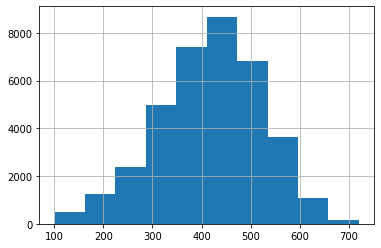

In [201]:
##### distribución de scores 

var_scr = [v for v in df2.columns if v[:6]=='score_']
var_scr

df2['total_score'] = df2[var_scr].sum(axis=1)
df2['total_score'].hist()

In [203]:
df2.total_score.describe()

count    36886.000000
mean       417.793797
std        105.266303
min        101.000000
25%        350.000000
50%        423.000000
75%        491.000000
max        720.000000
Name: total_score, dtype: float64

In [205]:
for v in varw:    
    print(df2[['score_'+v[2:],v[2:]]].groupby(v[2:]).max())

                           score_OCPUACION_SEXO
OCPUACION_SEXO                                 
A_CON NEGOCIO/M                             100
B_EMPLEADO O ASALARIADO/M                    62
C_CON NEGOCIO/F                              53
D_EMPLEADO O ASALARIADO/F                    25
E_JUBILADO/M                                -25
F_JUBILADO/F                                -49
                          score_CUENTA_MAS_ANTIGUA_BANCO
CUENTA_MAS_ANTIGUA_BANCO                                
(-0.001, 36.0]                                        83
(104.0, 131.0]                                        30
(131.0, 499.0]                                        13
(36.0, 59.0]                                          64
(59.0, 76.0]                                          64
(76.0, 104.0]                                         41
nan                                                   77
                   score_MAX_MOP_6M_AB_TDC
MAX_MOP_6M_AB_TDC                         
(-0.001, 1.0]    

In [206]:
for v in varw:    
    print(df2[['score_'+v[2:],v[2:]]].groupby(v[2:]).min())

                           score_OCPUACION_SEXO
OCPUACION_SEXO                                 
A_CON NEGOCIO/M                             100
B_EMPLEADO O ASALARIADO/M                    62
C_CON NEGOCIO/F                              53
D_EMPLEADO O ASALARIADO/F                    25
E_JUBILADO/M                                -25
F_JUBILADO/F                                -49
                          score_CUENTA_MAS_ANTIGUA_BANCO
CUENTA_MAS_ANTIGUA_BANCO                                
(-0.001, 36.0]                                        83
(104.0, 131.0]                                        30
(131.0, 499.0]                                        13
(36.0, 59.0]                                          64
(59.0, 76.0]                                          64
(76.0, 104.0]                                         41
nan                                                   77
                   score_MAX_MOP_6M_AB_TDC
MAX_MOP_6M_AB_TDC                         
(-0.001, 1.0]    

In [0]:
##score bins 

num_bins = 20
df2['range_score'] = pd.qcut(df2['total_score'],num_bins, duplicates = 'drop' ).astype(str)

In [238]:
aux_scr = df2[['range_score','TARGET']].copy()
aux_scr['n']= 1

aux_scr = aux_scr.pivot_table(index= 'range_score' , columns = 'TARGET' , aggfunc = 'count')

aux_scr.columns = aux_scr.columns.droplevel() 

aux_scr.reset_index()


aux_scr['buenos_acum'] = aux_scr[0].cumsum()
aux_scr['malos_acum'] = aux_scr[1].cumsum()

aux_scr['total'] = aux_scr[0]+aux_scr[1]

aux_scr['pct_buenos'] = aux_scr[0] /aux_scr[0].sum()
aux_scr['pct_malos']  = aux_scr[1] /aux_scr[1].sum()

aux_scr['pct_buenos_acum'] = aux_scr['buenos_acum'] /aux_scr[0].sum()
aux_scr['pct_malos_acum']  = aux_scr['malos_acum'] /aux_scr[1].sum()


aux_scr['pct_total'] =aux_scr['total'] /aux_scr['total'].sum()

aux_scr['odds'] =aux_scr[0] /aux_scr[1]

aux_scr['br'] =aux_scr[1] /aux_scr['total']

aux_scr['ks_aux'] = aux_scr['pct_buenos_acum'] - aux_scr['pct_malos_acum']

aux_scr


TARGET,0,1,buenos_acum,malos_acum,total,pct_buenos,pct_malos,pct_buenos_acum,pct_malos_acum,pct_total,odds,br,ks_aux
range_score,,,,,,,,,,,,,
"(100.999, 229.0]",1765,94,1765,94,1859,0.060929,0.011872,0.060929,0.011872,0.050399,18.776596,0.050565,0.049058
"(229.0, 280.0]",1678,171,3443,265,1849,0.057926,0.021596,0.118855,0.033468,0.050127,9.812865,0.092482,0.085387
"(280.0, 308.0]",1657,180,5100,445,1837,0.057201,0.022733,0.176056,0.056201,0.049802,9.205556,0.097986,0.119855
"(308.0, 330.0]",1662,173,6762,618,1835,0.057374,0.021849,0.233430,0.078050,0.049748,9.606936,0.094278,0.155380
"(330.0, 350.0]",1634,216,8396,834,1850,0.056407,0.027280,0.289837,0.105330,0.050155,7.564815,0.116757,0.184507
"(350.0, 367.0]",1686,248,10082,1082,1934,0.058202,0.031321,0.348039,0.136651,0.052432,6.798387,0.128232,0.211389
"(367.0, 382.0]",1524,268,11606,1350,1792,0.052610,0.033847,0.400649,0.170498,0.048582,5.686567,0.149554,0.230151
"(382.0, 397.0]",1626,284,13232,1634,1910,0.056131,0.035868,0.456780,0.206365,0.051781,5.725352,0.148691,0.250415
"(397.0, 411.0]",1478,318,14710,1952,1796,0.051022,0.040162,0.507802,0.246527,0.048691,4.647799,0.177060,0.261275


In [241]:
ks = aux_scr['ks_aux'].max()
print(ks)

0.271077137385626
